# Data Visualization/Analysis

## Placeholder Notebook

This notebook is initially set up to allow you to quickly start examining the data you have. You should expect it to change a lot over the course of the week as you add features and explore the data.

The majority of your code is likely to be in your package (i.e. the `flood_tool` directory). You should import this package into this notebook and use it to explore\analysis the data.

You should try to make sure that this synergizes with the predictive tools your team is building, for example identifiying high risk areas near locations of heavy rainfall or high river/tide levels.

### A quick look at postcode data

In [1]:
import os
import sys
sys.path.append('..') # Add parent directory to path to always find flood_tool
                      # This is not best practice, but it works for this example

import pandas as pd
import matplotlib.pyplot as plt

import flood_tool as ft

# The unlabelled postcode data
df1 = pd.read_csv(os.path.join(ft._data_dir,
                               'postcodes_unlabelled.csv'))
df1.head()

,postcode,easting,northing,soilType,elevation
0,M34 7QL,393470,394371,Unsurveyed/Urban,110
1,OL4 3NQ,395420,405669,Unsurveyed/Urban,210
2,B36 8TE,411900,289400,Unsurveyed/Urban,90
3,NE16 3AT,420400,562300,Unsurveyed/Urban,10
4,WS10 8DE,397726,296656,Unsurveyed/Urban,140


In [2]:
# The labelled postcode data

df2 = pd.read_csv(os.path.join(ft._data_dir, 'postcodes_labelled.csv'))
df2.head()

,postcode,easting,northing,soilType,elevation,localAuthority,riskLabel,medianPrice,historicallyFlooded
0,OL9 7NS,390978,403269,Unsurveyed/Urban,130,Oldham,1,119100.0,False
1,WV13 2LR,396607,298083,Unsurveyed/Urban,130,Walsall,1,84200.0,False
2,LS12 1LZ,427859,432937,Unsurveyed/Urban,60,Leeds,1,134900.0,False
3,SK15 1TS,395560,397900,Unsurveyed/Urban,120,Tameside,1,170200.0,False
4,TS17 9NN,445771,515362,Unsurveyed/Urban,20,Stockton-on-Tees,1,190600.0,False


<Axes: >

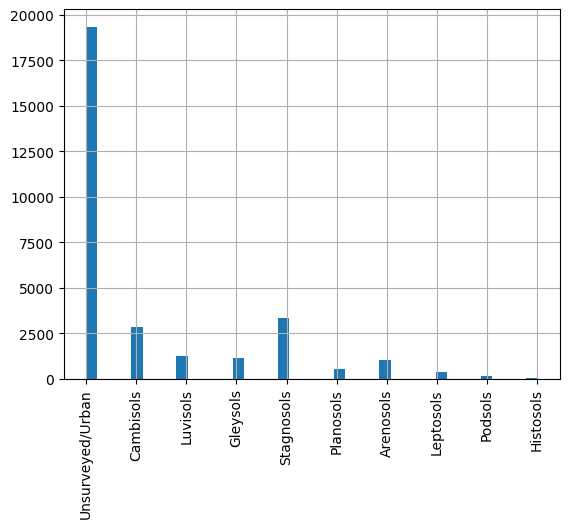

In [18]:
df2.soilType.hist(bins=40, xrot=90)


<Axes: title={'center': 'Risk Label Distribution'}, xlabel='riskLabel'>

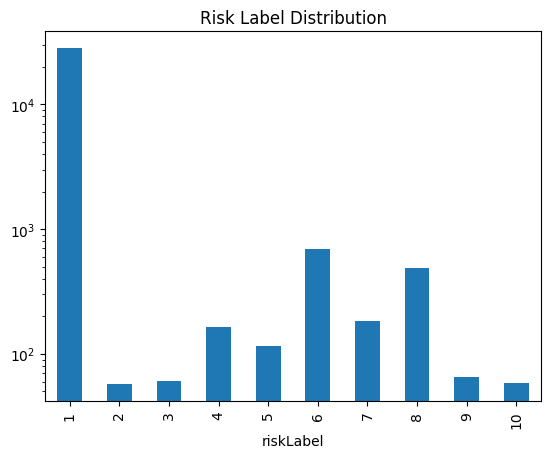

In [3]:
df2.riskLabel.value_counts().sort_index().plot(kind='bar', title='Risk Label Distribution', logy=True)

In [4]:
# The data on households/population per sector

df3 = pd.read_csv(os.path.join(ft._data_dir, 'sector_data.csv'))
df3.head()

,postcodeSector,households,numberOfPostcodeUnits,headcount
0,AL1 1,2546,311,6080
1,AL1 2,2642,236,6942
2,AL1 3,2272,388,5821
3,AL1 4,3707,339,9635
4,AL1 5,4406,347,10560


In [5]:
# The data on measurement stations

df4 = pd.read_csv(os.path.join(ft._data_dir, 'stations.csv'))
df4.tail()

,stationReference,stationName,latitude,longitude,maxOnRecord,minOnRecord,typicalRangeHigh,typicalRangeLow
2021,E71839,Portsmouth,50.802280,-1.111170,NaN,NaN,NaN,NaN
2022,E71939,Bournemouth,50.714331,-1.874873,NaN,NaN,NaN,NaN
2023,E70739,Aberdeen,57.144060,-2.077360,NaN,NaN,NaN,NaN
2024,E74239,Tobermory,56.623110,-6.064220,NaN,NaN,NaN,NaN
2025,E73339,Llandudno,53.331670,-3.825220,NaN,NaN,NaN,NaN


In [6]:
# The data for a wet day

df5 = pd.read_csv(os.path.join(ft._data_dir, 'wet_day.csv'))
df5.head()

,dateTime,stationReference,parameter,qualifier,unitName,value
0,2023-10-20T00:00:00Z,4205,level,Stage,mASD,0.137
1,2023-10-20T00:00:00Z,E6380,level,Stage,mAOD,2.146
2,2023-10-20T00:00:00Z,E7270,rainfall,Tipping Bucket Raingauge,mm,1.4
3,2023-10-20T00:00:00Z,2653,level,Stage,mASD,0.119
4,2023-10-20T00:00:00Z,3697TH,level,Downstream Stage,mASD,1.617


Text(0.5, 0, 'Rainfall (mm/15 mins)')

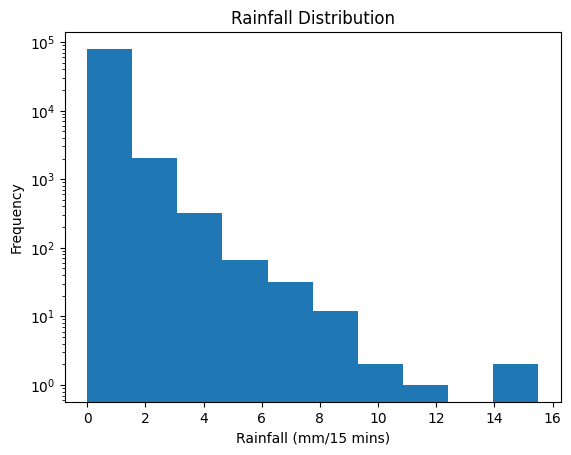

In [7]:
rain = pd.to_numeric( df5.value.loc[(df5.parameter=='rainfall')], errors='coerce')

rain.loc[(rain>=0) & (rain<=20)].plot(kind='hist',
                                      title='Rainfall Distribution',
                                      logy=True)
plt.xlabel('Rainfall (mm/15 mins)')

In [8]:
# The data for a more typical day

df6 = pd.read_csv(os.path.join(ft._data_dir, 'typical_day.csv'))
df6.head()

,dateTime,stationReference,parameter,qualifier,unitName,value
0,2021-10-10T00:00:00Z,000008,rainfall,Tipping Bucket Raingauge,mm,0.000
1,2021-10-10T00:00:00Z,000028,rainfall,Tipping Bucket Raingauge,mm,0.000
2,2021-10-10T00:00:00Z,000075TP,rainfall,Tipping Bucket Raingauge,mm,0.000
3,2021-10-10T00:00:00Z,000076TP,rainfall,Tipping Bucket Raingauge,mm,0.000
4,2021-10-10T00:00:00Z,0001,level,Tidal Level,mAOD,2.431


Text(0.5, 0, 'Rainfall (mm/15 mins)')

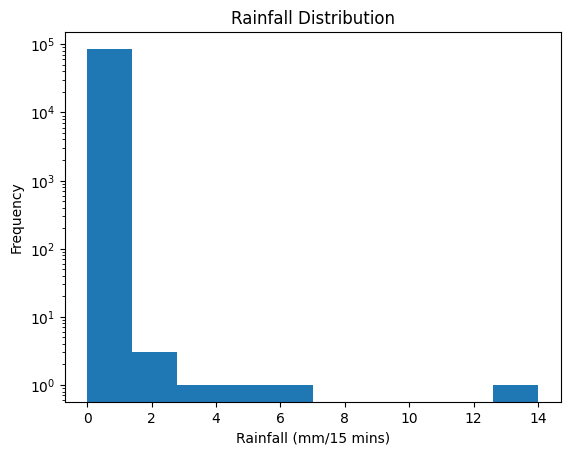

In [9]:
rain = pd.to_numeric( df6.value.loc[(df6.parameter=='rainfall')], errors='coerce')
rain.loc[(rain>=0) & (rain<=20)].plot(kind='hist',
                                      title='Rainfall Distribution',
                                      xlabel='Rainfall (mm/15 mins)',
                                      logy=True)
plt.xlabel('Rainfall (mm/15 mins)')

### Mapping your data

As one possible approach, we have provided a function to plot a circle on a map using the `folium` package. You can use `folium` and expand on this functionality, or you may prefer to use a different package. Please check with us that the mapping package you wish to use is permissible before you start.

In [10]:
## Mapping functionality
map = ft.plot_circle(53., 0, 2000.) #Plots a circle of radius 2000 m at the lat, lon: 53., 0.

import folium
folium.Marker(location=(53, 0.1), 
                  popup='This is my popup',
                  icon=folium.Icon(color='black', icon='info-sign')).add_to(map)
map